In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
positive = np.vstack((
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    ),
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    )
)).T

In [3]:
negative = np.vstack((
    np.concatenate(
        (np.random.normal(loc=1.0, scale=0.5, size=200),
         np.random.normal(loc=-1.0, scale=0.5, size=200))
    ),
    np.concatenate(
        (np.random.normal(loc=-1.0, scale=0.5, size=200),
         np.random.normal(loc=1.0, scale=0.5, size=200))
    )
)).T

In [4]:
data = np.vstack((positive, negative))
labels = np.vstack(([[1, 0]]*400, [[0, 1]]*400));

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(2,), activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal(),),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [5]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metric=['accuracy']);

model.fit(data, labels, epochs=100)

Train on 800 samples
Epoch 1/100
800/800 [==============================] - 1s 1ms/sample - loss: 0.7405
Epoch 2/100
800/800 [==============================] - 0s 107us/sample - loss: 0.7223
Epoch 3/100
800/800 [==============================] - 0s 74us/sample - loss: 0.7094
Epoch 4/100
800/800 [==============================] - 0s 66us/sample - loss: 0.6983
Epoch 5/100
800/800 [==============================] - 0s 76us/sample - loss: 0.6907
Epoch 6/100
800/800 [==============================] - 0s 106us/sample - loss: 0.6846
Epoch 7/100
800/800 [==============================] - 0s 96us/sample - loss: 0.6796
Epoch 8/100
800/800 [==============================] - 0s 120us/sample - loss: 0.6758
Epoch 9/100
800/800 [==============================] - 0s 90us/sample - loss: 0.6720
Epoch 10/100
800/800 [==============================] - 0s 98us/sample - loss: 0.6686
Epoch 11/100
800/800 [==============================] - 0s 91us/sample - loss: 0.6653
Epoch 12/100
800/800 [==================

800/800 [==============================] - 0s 55us/sample - loss: 0.2558
Epoch 97/100
800/800 [==============================] - 0s 52us/sample - loss: 0.2540
Epoch 98/100
800/800 [==============================] - 0s 46us/sample - loss: 0.2522
Epoch 99/100
800/800 [==============================] - 0s 45us/sample - loss: 0.2506
Epoch 100/100
800/800 [==============================] - 0s 70us/sample - loss: 0.2490


In [6]:
predicted = model.predict(data)

same = 0
for i in range(len(labels)):
    same += np.argmax(predicted[i]) == np.argmax(labels[i])

print("Accuracy: ", float(same)/float(len(labels)))

Accuracy:  0.91875


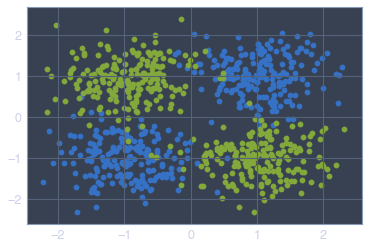

In [7]:
plt.scatter(positive[:,0], positive[:, 1])
plt.scatter(negative[:,0], negative[:, 1])
plt.show()